In [33]:
import pandas as pd
import numpy as np
from math import sqrt
from math import pi
from math import exp
import matplotlib.pyplot as plt

df = pd.read_csv('health_data.csv')

print(df.head())

   age  restbps  chol  category
0   26      109   243         0
1   27      106   156         0
2   28      107   225         0
3   27      105   277         0
4   30       96   221         0


In [34]:
#randomize indces, take the first 80% of the indices and last 20 percent as test
indices = np.random.permutation(df.shape[0])
train_ind, test_ind = indices[:int(0.7*df.shape[0])], indices[int(0.7*df.shape[0]):]
# print(len(train_ind), len(test_ind))

#select the data corresponding to the train and test indices and save into 2 dataframes. Reset index afterwards
train_df, test_df = df.loc[train_ind, :], df.loc[test_ind, :]
train_df, test_df = train_df.reset_index(), test_df.reset_index()

#print('Train data is : \n', train_df.head(), ' \nnumber of rows = {}'.format(train_df.shape[0]))
#print('Test data is : \n', test_df.head(), ' \nnumber of rows = {}'.format(test_df.shape[0]))

In [36]:
x_train = train_df.iloc[:,1:4]
y_train = train_df.iloc[:,4]

x_test = test_df.iloc[:,1:4]
y_test = test_df.iloc[:,4]

x_train['ones'] = 1
x_test['ones'] = 1

print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())

for col in ['age', 'restbps', 'chol']:
    x_train[col] = (x_train[col]-x_train[col].mean())/(x_train[col].std())
    x_test[col] = (x_test[col]-x_test[col].mean())/(x_test[col].std())

   age  restbps  chol  ones
0   67      136   301     1
1   36      134   223     1
2   33      114   216     1
3   47      138   271     1
4   44      119   299     1
0    1
1    1
2    0
3    1
4    0
Name: category, dtype: int64
   age  restbps  chol  ones
0   33      110   220     1
1   54      135   254     1
2   55      149   249     1
3   25      105   242     1
4   30       96   221     1
0    0
1    1
2    1
3    0
4    0
Name: category, dtype: int64


In [37]:
X_train = x_train.to_numpy()
X_test = x_test.to_numpy()
print(X_train.shape)
print(X_test.shape)
W = np.random.random((X_train.shape[1],1))
print(W.shape)
Y_train = y_train.to_numpy()
Y_train = np.reshape(Y_train,(Y_train.shape[0],1))
Y_test = y_test.to_numpy()
Y_test = np.reshape(Y_test,(Y_test.shape[0],1))
print(Y_train.shape)
print(Y_test.shape)

(489, 4)
(211, 4)
(4, 1)
(489, 1)
(211, 1)


In [38]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def loss(W,X,Y):
    mean = sigmoid(np.matmul(X,W)) #assuming that the function will calc sigmoid elementwise
    #mean shape = (489,1)
    #y shape = (489,1)
    logloss = 0
    for i in range(Y.shape[0]):
        logloss = logloss - Y[i]*mean[i] - (1-Y[i])*(1-mean[i])
    return logloss

In [60]:
def gradient(W,X,Y):
    mean = sigmoid(np.matmul(X,W))
    return np.matmul(X.T,(Y - mean))

def sgd(W,X,Y,X_test,Y_test,rate,num_iter):
    train_loss, test_loss =[], []
    for _ in range(0, num_iter):
        grad = gradient(W,X,Y)
        W = W + rate*grad
        train_loss.append(loss(W,X,Y))
        test_loss.append(loss(W,X_test,Y_test))
    return W, train_loss, test_loss

num_iter = 2000
rate = 0.0001

W, train_loss, test_loss = sgd(W,X_train,Y_train,X_test,Y_test,rate,num_iter)


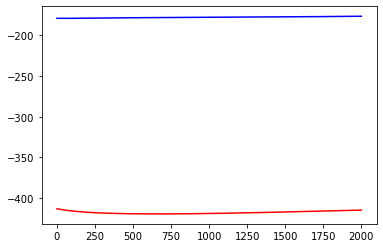

In [61]:
plt.plot(train_loss, 'r')
plt.plot(test_loss, 'b')
plt.show()